In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv('both.csv')
data = pd.DataFrame(data.values[:, 1:5], columns=['lon', 'lat', 'plon', 'plat'])
data.head(n=10)

,lon,lat,plon,plat
0,-73.974228,40.740402,-73.956551,40.733932
1,-0.109380,51.514629,-1.617727,53.785324
2,11.965316,57.701391,11.970102,57.703602
3,-3.177368,51.484031,-3.419140,51.706676
4,-122.332845,47.624431,-122.678070,48.506680
5,29.014727,41.040287,29.053541,40.979324
6,-3.698262,40.432953,-0.349279,39.458981
7,-122.415811,37.778129,-122.405975,37.783192
8,-73.984697,40.734274,-73.954956,40.784729
9,-83.747251,42.305744,-83.760040,42.410336


In [6]:
from astropy.coordinates import spherical_to_cartesian

def transform2cart(lon, lat):
    x, y, z = spherical_to_cartesian(6371, np.radians(lat), np.radians(lon))
    return np.array([x, y, z])

In [8]:
dists = []

for row in data.values:
    lon, lat, plon, plat = row
    dist = np.linalg.norm(transform2cart(lon, lat) - transform2cart(plon, plat))
    dists.append(dist)

In [10]:
data = data.join(pd.DataFrame({'dist' : dists}))
data.head(n=10)

,lon,lat,plon,plat,dist
0,-73.974228,40.740402,-73.956551,40.733932,1.654017
1,-0.109380,51.514629,-1.617727,53.785324,272.185273
2,11.965316,57.701391,11.970102,57.703602,0.375902
3,-3.177368,51.484031,-3.419140,51.706676,29.863287
4,-122.332845,47.624431,-122.678070,48.506680,101.398925
5,29.014727,41.040287,29.053541,40.979324,7.520451
6,-3.698262,40.432953,-0.349279,39.458981,305.289563
7,-122.415811,37.778129,-122.405975,37.783192,1.031550
8,-73.984697,40.734274,-73.954956,40.784729,6.144119
9,-83.747251,42.305744,-83.760040,42.410336,11.677400


In [12]:
data.values.shape

(7927, 5)

In [33]:
accuracy = []
max_dist = 100 # km

for distance in np.linspace(1, max_dist, max_dist // 2):
    filtered_data = data.loc[data['dist'] < distance]
    accuracy.append(filtered_data.shape[0]/data.shape[0] * 100.)

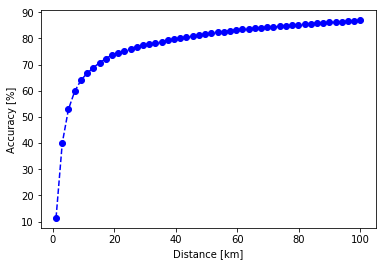

In [34]:
plt.plot(np.linspace(1, max_dist, max_dist // 2), accuracy, 'bo--')
plt.xlabel("Distance [km]")
plt.ylabel("Accuracy [%]")